# Final Project(Part A): Airbnb Price Prediction and Insights

### Importing useful libraries 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [39]:

df = pd.read_csv('airbnb_data.csv')

# Display the first few rows to understand the structure
print("First few rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nDataset information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

First few rows of the dataset:
         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524 

### Check for missing values in each column

In [46]:

print("\n>>> Initially Missing values in each column:")
print(df.isnull().sum())


>>> Initially Missing values in each column:
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


### Handle missing values

In [47]:
# For numerical columns, impute with median

df['bathrooms'] = df['bathrooms'].fillna(df['bedrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

# For text columns, fill with empty strings

df['host_response_rate'] = df['host_response_rate'].fillna('na')
df['neighbourhood'] = df['neighbourhood'].fillna('na')
df['thumbnail_url'] = df['thumbnail_url'].fillna('na')
df['zipcode'] = df['zipcode'].fillna('na')

# For date columns, using interpolate function for filling missing values

df['first_review'] = pd.to_datetime(df['first_review'], format='%d-%m-%Y')  # First review date
df['first_review'] = df['first_review'].fillna(df['first_review'].interpolate())
df['host_since'] = pd.to_datetime(df['host_since'], format='%d-%m-%Y')  # Host join date
df['host_since'] = df['host_since'].fillna(df['host_since'].interpolate())
df['last_review'] = pd.to_datetime(df['last_review'], format='%d-%m-%Y')  # Last review date
df['last_review'] = df['last_review'].fillna(df['last_review'].interpolate())

# Convert categorical boolean columns ('t'/'f' -> 1/0)

bool_cols = ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified']
for col in bool_cols:
    df[col] = df[col].map({'t': 1, 'f': 0})
# For boolean columns, using interpolate function for filling missing values
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].interpolate())
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].interpolate())
df['instant_bookable'] = df['instant_bookable'].fillna(df['instant_bookable'].interpolate())



>>> After handling missing values in each column: 
(0)No Missing Values
id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


### Verify Data Types and Units and ensure data types align with the data dictionary.

In [48]:

df['id'] = df['id'].astype(str)  # Unique identifier (String)
df['log_price'] = df['log_price'].astype(float)  # Log-transformed price (Float)
df['property_type'] = df['property_type'].astype(str)  # Property type (String)
df['room_type'] = df['room_type'].astype(str)  # Room type (String)
df['amenities'] = df['amenities'].astype(str)  # List of amenities (String)
df['accommodates'] = df['accommodates'].astype(int)  # Number of guests (Integer)
df['bathrooms'] = df['bathrooms'].astype(float)  # Number of bathrooms (Float, as it can be fractional)
df['bed_type'] = df['bed_type'].astype(str)  # Type of bed (String)
df['cancellation_policy'] = df['cancellation_policy'].astype(str)  # Cancellation policy (String)
df['cleaning_fee'] = df['cleaning_fee'].astype(bool)  # Cleaning fee (Boolean)
df['city'] = df['city'].astype(str)  # City (String)
df['description'] = df['description'].astype(str)  # Description (String)
df['first_review'] = pd.to_datetime(df['first_review'], format='%d-%m-%Y')  # First review date (Date)
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(bool)  # Host profile picture (Boolean)
df['host_identity_verified'] = df['host_identity_verified'].astype(bool)  # Host identity verified (Boolean)
df['host_response_rate'] = df['host_response_rate'].astype(str)  # Host response rate (String)
df['host_since'] = pd.to_datetime(df['host_since'], format='%d-%m-%Y')  # Host join date (Date)
df['instant_bookable'] = df['instant_bookable'].astype(bool)  # Instant bookable (Boolean)
df['last_review'] = pd.to_datetime(df['last_review'], format='%d-%m-%Y')  # Last review date (Date)
df['latitude'] = df['latitude'].astype(float)  # Latitude (Float)
df['longitude'] = df['longitude'].astype(float)  # Longitude (Float)
df['name'] = df['name'].astype(str)  # Listing name (String)
df['neighbourhood'] = df['neighbourhood'].astype(str)  # Neighborhood (String)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)  # Number of reviews (Integer)
df['review_scores_rating'] = df['review_scores_rating'].astype(float)  # Review score (Float)
df['thumbnail_url'] = df['thumbnail_url'].astype(str)  # Thumbnail URL (String)
df['zipcode'] = df['zipcode'].astype(str)  # Zip code (String)
df['bedrooms'] = df['bedrooms'].astype(int)  # Number of bedrooms (Integer)
df['beds'] = df['beds'].astype(int)  # Number of beds (Integer)



Unique values for categorical columns:
Property Types: ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']
Room Types: ['Entire home/apt' 'Private room' 'Shared room']
Bed Types: ['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed']
Cancellation Policies: ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']

Range of numerical columns:
Accommodates: 1 - 16
Bathrooms: 0.0 - 8.0
Bedrooms: 0 - 10
Beds: 0 - 18
Review Scores Rating: 20.0 - 100.0

Date range for date columns:
First Review: 2008-11-17 00:00:00 - 2017-10-05 00:00:00
Host Since: 2008-03-03 00:00:00 - 2017-10-04 00:00:00
Last Review: 2009-01-21 00:00:00 - 2017-10-05 00:00:00


### Analyze and Visualize Trends and Outliers

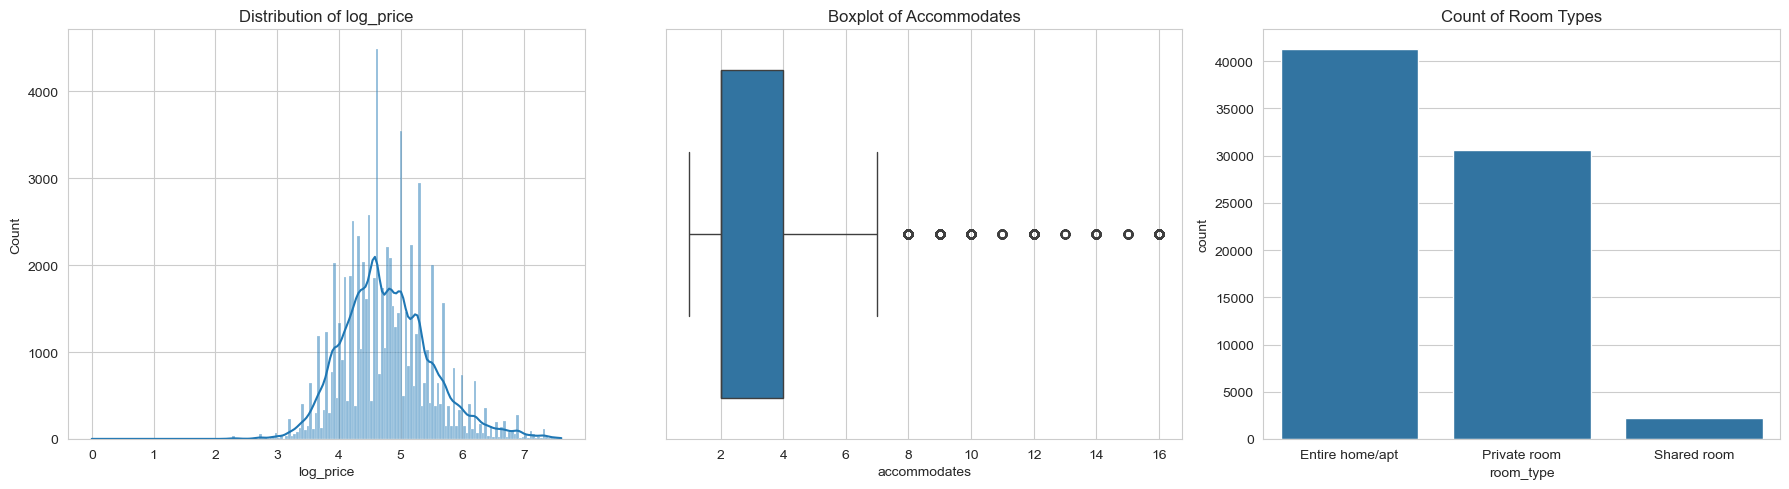

In [49]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Visualize the distribution of the target variable (log_price)
# Distribution of log_price

sns.histplot(df['log_price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of log_price')

# Boxplot for numerical columns to detect outliers
# Boxplot of Accommodates

sns.boxplot(x=df['accommodates'], ax=axes[1])
axes[1].set_title('Boxplot of Accommodates')

# Count plot for categorical columns (e.g., room_type)
# Count plot of Room Types

sns.countplot(x=df['room_type'], ax=axes[2])
axes[2].set_title('Count of Room Types')

plt.tight_layout()
plt.show()

### Feature Engineering and Data Transformation

In [50]:
# Count the number of amenities in the 'amenities' column (Safe Parsing)

df['amenities_count'] = df['amenities'].apply(lambda x: len(str(x).strip('{}').split(',')) if isinstance(x, str) else 0)
print(">>> Number of amenities in the 'amenities' column\n", df['amenities_count'])

# Convert 'host_since' to datetime and calculate host activity (years since joining)

df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_activity'] = (pd.Timestamp.now() - df['host_since']).dt.days / 365
print("\n>>> Number of years since the host joined\n", df['host_activity'])

# Compute Neighborhood Popularity (Count of listings per neighborhood)

neighbourhood_popularity = df['neighbourhood'].value_counts().to_dict()
df['neighbourhood_popularity'] = df['neighbourhood'].map(neighbourhood_popularity)
print("\n>>> Number of listings in each neighborhood\n", df['neighbourhood_popularity'])

# Calculate the length of the description

df['description_length'] = df['description'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
print("\n>>> Description Length\n", df['description_length'])

# Convert date columns to the number of days since the given date

def convert_date(df, col):
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col] = (datetime.now() - df[col]).dt.days
    return df[col]

date_cols = ['host_since', 'first_review', 'last_review']
for col in date_cols:
    df[col] = convert_date(df, col)

>>> Number of amenities in the 'amenities' column
 0         9
1        15
2        19
3        15
4        12
         ..
74106     1
74107    16
74108    31
74109    15
74110    18
Name: amenities_count, Length: 74111, dtype: int64

>>> Number of years since the host joined
 0        12.980822
1         7.745205
2         8.394521
3         9.915068
4        10.049315
           ...    
74106    11.986301
74107     8.873973
74108    13.202740
74109     7.498630
74110    12.309589
Name: host_activity, Length: 74111, dtype: float64

>>> Number of listings in each neighborhood
 0         111
1        1299
2        1374
3         124
4         298
         ... 
74106    2862
74107      80
74108    2862
74109     606
74110     573
Name: neighbourhood_popularity, Length: 74111, dtype: int64

>>> Description Length
 0         211
1        1000
2        1000
3         468
4         699
         ... 
74106      24
74107     302
74108    1000
74109     555
74110    1000
Name: description_lengt

### Model Development

In [51]:
# Define Features and Target Variable

X = df.drop(columns=['log_price', 'id', 'name', 'description', 'amenities', 
                     'host_response_rate', 'first_review', 'last_review', 
                     'host_since', 'neighbourhood', 'thumbnail_url', 'zipcode'])
y = df['log_price']

# Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Boolean ('True'/'False') to Numeric (1/0)

bool_cols = ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified']
for col in bool_cols:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)
    
# One-Hot Encode Categorical Variables

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure X_train and X_test Have Same Columns

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Standardize Numerical Features

scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns  # Select only numeric columns

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


Final numeric columns in X_train: ['bathrooms', 'latitude', 'longitude', 'review_scores_rating', 'amenities_count', 'host_activity', 'neighbourhood_popularity', 'description_length']
Final non-numeric columns in X_train: ['accommodates', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'number_of_reviews', 'bedrooms', 'beds', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Casa particular', 'property_type_Castle', 'property_type_Cave', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Earth House', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Hut', 'property_type_In-law', 'property_type_Island', 'property_type_Loft', 'property_type_Other', 'property_type_Parking Space', 'property_type_Serviced apartment', 'pro

### Models Evaluation using metrics RMSE, MAE and R²

In [52]:
# Define models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),}

# Function to evaluate models and find the best one

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    best_model = None
    best_score = float("-inf")

    for name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions

        # Evaluate performance
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

        # Track the best model based on R² Score
        
        if r2 > best_score:
            best_score = r2
            best_model = model

    return results, best_model

# Train and evaluate all models

results, best_model = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Convert results to a DataFrame for better readability

results_df = pd.DataFrame(results).T
print("Model Evaluation Metrics:\n", results_df)

# Use the best model for final predictions

y_pred_best = best_model.predict(X_test)

# Display final evaluation for best model

print("\nBest Model:", best_model)
print(f"Best Model RMSE: {mean_squared_error(y_test, y_pred_best, squared=False)}")
print(f"Best Model MAE: {mean_absolute_error(y_test, y_pred_best)}")
print(f"Best Model R² Score: {r2_score(y_test, y_pred_best)}")

Model Evaluation Metrics:
                         MAE      RMSE  R² Score
Linear Regression  0.347517  0.462757  0.583155
Decision Tree      0.391769  0.545881  0.419951
Random Forest      0.279465  0.389727  0.704341
Gradient Boosting  0.301797  0.411525  0.670344

✅Best Model: RandomForestRegressor(random_state=42)
Best Model RMSE: 0.3897274685105824
Best Model MAE: 0.27946461892002966
Best Model R² Score: 0.7043413615417913


### Model Tuning

In [53]:
# Define the parameter grid for tuning

param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf}

# Initialize Random Forest Regressor

rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, 
    cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

# Fit on training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model with optimized hyperparameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = best_rf.predict(X_test)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned, squared=False)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned Random Forest Model Performance:")
print(f" RMSE: {rmse_tuned:.4f}")
print(f" MAE: {mae_tuned:.4f}")
print(f" R²: {r2_tuned:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}

✅Tuned Random Forest Model Performance:
 RMSE: 0.3883
 MAE: 0.2790
 R²: 0.7065


### Visualizations with Charts and Graphs

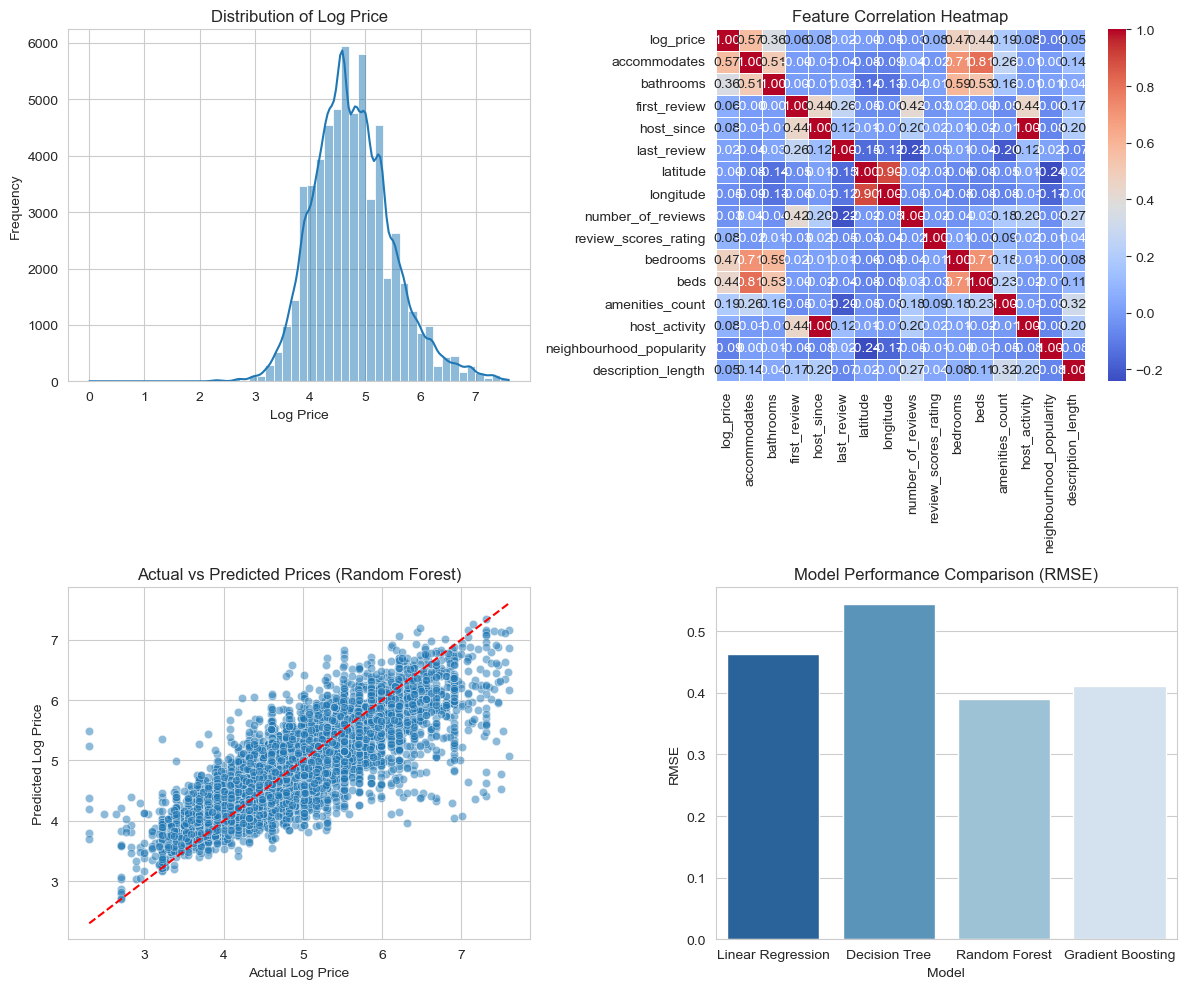

In [54]:
# Model Results DataFrame
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "RMSE": [0.4627, 0.5439, 0.3896, 0.4109],
    "MAE": [0.3475, 0.3917, 0.2794, 0.3013],
    "R² Score": [0.5831, 0.4241, 0.7044, 0.6713]
})

# Set style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of Log Price
sns.histplot(y_train, bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set(title="Distribution of Log Price", xlabel="Log Price", ylabel="Frequency")

# Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns for correlation
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Feature Correlation Heatmap")

# Actual vs Predicted Prices (Best Model)
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5, ax=axes[1, 0])
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
axes[1, 0].set(title="Actual vs Predicted Prices (Random Forest)", xlabel="Actual Log Price", ylabel="Predicted Log Price")

# Model Performance (Bar Chart)
sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_r", ax=axes[1, 1])
axes[1, 1].set_title("Model Performance Comparison (RMSE)")

plt.tight_layout()
plt.show()

### Feature Importance


Feature Importance:
room_type_Private room           2.824651e-01
bedrooms                         1.240796e-01
longitude                        1.098717e-01
latitude                         9.831641e-02
room_type_Shared room            6.015859e-02
                                     ...     
property_type_Earth House        2.256283e-06
property_type_Cave               1.131231e-06
property_type_Parking Space      8.468637e-07
property_type_Chalet             6.708208e-07
property_type_Casa particular    2.428108e-07
Length: 64, dtype: float64


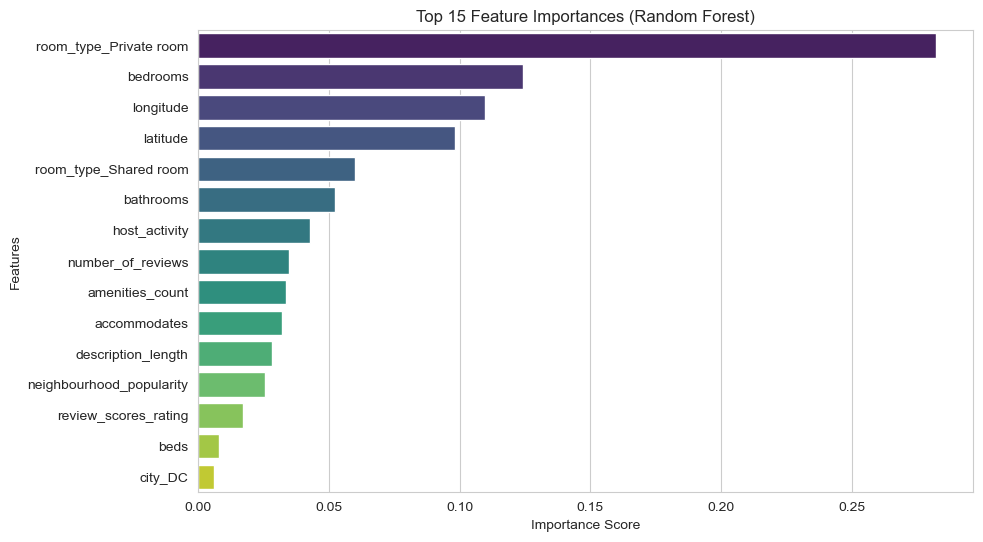

In [55]:
# Compute Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Print Feature Importance
print("\nFeature Importance:")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:15], y=feature_importance.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Save the Preprocessed Data and Model

In [56]:

import joblib

# Ensure df contains only processed data
df_processed = df.copy()  # If necessary, create a clean version

# Save the preprocessed dataset
df_processed.to_csv('preprocessed_airbnb_data.csv', index=False)
print("Preprocessed dataset saved as 'preprocessed_airbnb_data.csv'")

# Save the trained model (Ensure 'best_rf' or final model exists)
joblib.dump(best_rf, 'airbnb_price_predictor.pkl')
print("Trained model saved as 'airbnb_price_predictor.pkl'")

Preprocessed dataset saved as 'preprocessed_airbnb_data.csv'
Trained model saved as 'airbnb_price_predictor.pkl'


## Video Explanation

### https://drive.google.com/file/d/1d9vrnK6V99GB6-WE_39njbLiXU1loHko/view?usp=drive_link